# Regression Challenge
I will use the Ames housing data to create a regression model that predicts the price of houses in Ames, IA.

---
## Reading in data

In [261]:
import pandas as pd

In [262]:
df = pd.read_csv('train.csv')

## EDA

In [263]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2010,WD,Abnorml,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,138500


In [264]:
df.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 82 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         20

In [266]:
df.columns

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [267]:
# are there any null values and what do we need to do with them
df.isnull().sum()[df.isnull().sum()>0]

Lot Frontage       330
Alley             1911
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1000
Garage Type        113
Garage Yr Blt      114
Garage Finish      114
Garage Cars          1
Garage Area          1
Garage Qual        114
Garage Cond        114
Pool QC           2042
Fence             1651
Misc Feature      1986
dtype: int64

What to do with the nulls:
- Alley (Type of alley access to property)
    - has 1911 null values, meaning 'No alley access'
    - Not expecting this to be a prominent feature due to only about 140 having alley access.
    - Will drop from df
    
    
- Lot Frontage (Linear feet of street connected to property) 
    - Only missing 330 values
    - Will use an imputer to replace with mean or median decided by looking at histogram
    
    
- Mas Vnr Type (Masonry veneer type)
    - only 22 values listed as none


- Mas Vnr Area (Masonry veneer area in square feet)
    - only 22 values listed as none because if they do not have a Masonry veneer type, then it was listed as 0ft^2


- Bsmt Qual (Height of the basement)
    - 55 houses with No Basement


- Bsmt Cond (General condition of the basement)
    - 55 houses with No Basement


- Bsmt Exposure (Walkout or garden level basement walls)
    - 58 null values 
        - 55 houses with No Basement
        - 3  houses with basements but no walkout


- BsmtFin Type 1 (Quality of basement finished area) 55
    - 55 houses with No Basement
    - Might need to create a no basement column when use get_dummies


- BsmtFin SF 1 (Type 1 finished square feet)
    - 1 house with null value instead of 0.0 like 657 of the observations
    - I will replace this null value with 0.0 because if it doesn't exist it is effectively 0sqft


- BsmtFin Type 2 (Quality of second finished area (if present))
    - 56 with no basement


- BsmtFin SF 2 (Type 2 finished square feet) 
    - 1 house with null value instead of 0.0 like 657 of the observations
    - I will replace this null value with 0.0 because if it doesn't exist it is effectively 0sqft


- Bsmt Unf SF (Unfinished square feet of basement area)
    - There is only one house with NA, meaning it doesn't have a basement.
    - I can't put 0.0 due to that meaning it has a completed basement; I could potential put the mean or median
    - However, I may not end up finding this feature particulary important though.


- Total Bsmt SF (Total square feet of basement area)
    - 1 house with null value instead of 0.0 
    - I will replace this null value with 0.0 because if it doesn't exist it is effectively 0sqft


- Bsmt Full Bath (Basement full bathrooms)
    - 2 houses with null values
    - I will replace this null value with 0.0 because if it doesn't exist it is effectively 0sqft


- Bsmt Half Bath (Basement half bathrooms)
    - 2 houses with null values
    - I will replace this null value with 0.0 because if it doesn't exist it is effectively 0sqft


- Fireplace Qu (Fireplace quality)
    - 1000 houses with no fireplace
    - this will be an additional column when I get_dummies


- Garage Type (Garage location)
    - 113 houses with no garage
    - this will be an additional column when I get_dummies
    

- Garage Yr Blt (Year garage was built) 
    - 113 houses with no garage as seen above and one house with no record of year built
    - Will drop this column due to not being able to input a value for nulls and Garage Yr Blt is probably the same as the year the house was built unless an add on was done which doesn't seem important here.


- Garage Finish
    - 113 houses with no garage as seen above
    - and one house with no record of finish
    

- Garage Cars (Size of garage in car capacity)
    - 1 house with null value I will set to 0.0
    - There are 113 with 0.0 for this column, so this one is probably the one row with no data


- Garage Area 
    - 1 house with null value I will set to 0.0
    - There are 113 with 0.0 for this column, so this one is probably the one row with no data


- Garage Qual (Garage quality)
    - 113 houses with no garage as seen above
    - and one house with no record


- Garage Cond (Garage condition)
    - 113 houses with no garage as seen above
    - and one house with no record
    

- Pool QC (Pool quality)
    - 2042 houses with no pool.
    - Will drop column since it is not a prominent feature for most houses in this area


- Fence (Fence quality)
    - 1651 houses with no fence


- Misc Feature (Miscellaneous feature not covered in other categories)
    - 1986 houses with no Misc Features
    - will drop for similar line of thinking as lack of pools



## Dealing with NaN values
Some NaN values need to be changed to string for categorization with get_dummies
Other NaN values need to be converted to 0.0 to signify that it doesn't exist for that house

In [268]:
df.fillna(value={'Mas Vnr Type': 'None',
                 'Bsmt Qual': 'NA',
                 'Bsmt Cond': 'NA',
                 'Bsmt Exposure': 'NA',
                 'BsmtFin Type 1': 'NA',
                 'BsmtFin Type 2': 'NA',
                 'Fireplace Qu': 'NA',
                 'Garage Type': 'NA',
                 'Garage Finish': 'NA',
                 'Garage Qual': 'NA',
                 'Garage Cond': 'NA',
                 'Paved Drive': 'NA',
                 'Mas Vnr Area': 0.0,
                 'BsmtFin SF 1': 0.0,
                 'BsmtFin SF 2': 0.0,
                 'Total Bsmt SF': 0.0,
                 'Bsmt Full Bath': 0.0,
                 'Bsmt Half Bath': 0.0,
                 'Garage Cars': 0.0, 
                 'Garage Area': 0.0
                }, axis=0, inplace=True)

df.isnull().sum()[df.isnull().sum()>0]
# Still have some NaN values to deal with

Lot Frontage      330
Alley            1911
Bsmt Unf SF         1
Garage Yr Blt     114
Pool QC          2042
Fence            1651
Misc Feature     1986
dtype: int64

---
Lot Frontage (Linear feet of street connected to property): Using an imputer to replace with mean or median

In [269]:
import numpy as np
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mean:  69.05520046484602
median:  68.0


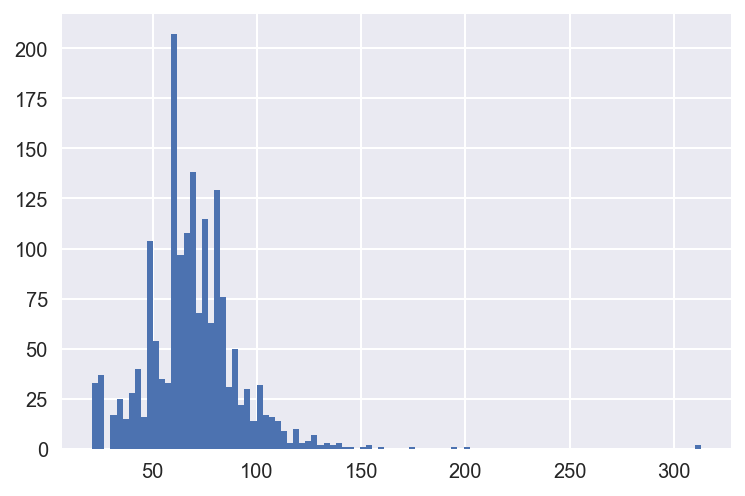

In [270]:
print('mean: ', df['Lot Frontage'].mean())
print('median: ', df['Lot Frontage'].median())

df['Lot Frontage'].hist(bins=100)

In [271]:
imp = Imputer(strategy='median')

In [272]:
df['Lot Frontage'] = pd.DataFrame(imp.fit_transform(df[['Lot Frontage']]))

In [273]:
df['Lot Frontage'].isnull().sum()[df['Lot Frontage'].isnull().sum()>0]
# Showing that there are no more null values in this column

array([], dtype=int64)

In [274]:
df['Lot Frontage'].value_counts()
# Showing that there are a lot of values that equal the median
# This suggests that the imputation was sucessful

68.0     358
60.0     179
70.0      96
80.0      94
50.0      90
65.0      71
75.0      68
85.0      52
63.0      38
78.0      33
24.0      33
21.0      32
90.0      31
74.0      31
64.0      31
72.0      30
62.0      28
73.0      25
100.0     23
82.0      21
52.0      20
57.0      20
43.0      20
66.0      19
79.0      19
53.0      18
59.0      18
67.0      18
88.0      16
51.0      16
        ... 
113.0      2
313.0      2
130.0      2
101.0      2
46.0       2
33.0       1
141.0      1
115.0      1
121.0      1
174.0      1
117.0      1
195.0      1
150.0      1
118.0      1
160.0      1
123.0      1
137.0      1
116.0      1
200.0      1
25.0       1
144.0      1
124.0      1
138.0      1
111.0      1
122.0      1
22.0       1
155.0      1
153.0      1
119.0      1
135.0      1
Name: Lot Frontage, Length: 118, dtype: int64

---
Dropping Unecessary Columns
- ID column because it does not influence price
- Ally because not expecting this to be a prominent feature due to only about 140 having alley access.
- BsmtUnfSF (Unfinished square feet of basement area) becasue not all houses have basements, and you can't put 0 because that would mean that the basement was completed.
- Garage Yr Blt due to not being able to input a value for nulls and Garage Yr Blt is probably the same as the year the house was built unless an add on was done which doesn't seem important here.
- Pool QC due to most houses not having this feature
- Fence  due to most houses not having this feature
- Misc Feature due to most houses not having this feature

In [275]:
df.drop(['Alley',
         'Id',
         'PID',
         'Bsmt Unf SF',
         'Garage Yr Blt',
         'Pool QC',
         'Fence', 
         'Misc Feature'
        ], axis=1, inplace=True)

---
## Get Dummies


In [276]:
df.shape

(2051, 74)

In [277]:
df = pd.get_dummies(df, prefix=['MasVnrType', 
                                           'BsmtQual', 
                                           'BsmtCond', 
                                           'BsmtExposure',
                                           'BsmtFinType1',
                                           'BsmtFinType2',
                                           'FireplaceQu',
                                           'GarageType',
                                           'GarageFinish',
                                           'GarageQual',
                                           'GarageCond',
                                           'PavedDrive'
                                          ], 
                               columns=['Mas Vnr Type', 
                                        'Bsmt Qual', 
                                        'Bsmt Cond', 
                                        'Bsmt Exposure',
                                        'BsmtFin Type 1',
                                        'BsmtFin Type 2',
                                        'Fireplace Qu',
                                        'Garage Type',
                                        'Garage Finish',
                                        'Garage Qual',
                                        'Garage Cond',
                                        'Paved Drive'
                                       ])

In [278]:
# Shows number of columns has increased
df.shape

(2051, 129)

In [279]:
df.isnull().sum()[df.isnull().sum()>0]
# All NaNs taken care of

Series([], dtype: int64)

---
Use get_dummies again to change objects/strings to floats

In [280]:
list(df.loc[:, df.dtypes == object])

['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Sale Type',
 'Sale Condition']

In [281]:
df = pd.get_dummies(df, prefix=['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'SaleType',
 'SaleCondition'],
                   columns=['MS Zoning',
 'Street',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Sale Type',
 'Sale Condition'])

In [282]:
df.shape

(2051, 289)

# Feature Selection with Pearson's Corr Coeff

In [283]:
target_corr = df.corr().abs()[['SalePrice']].sort_values(by=['SalePrice'], ascending=False)
target_corr = target_corr.loc[(target_corr['SalePrice'] > 0.50) & (target_corr['SalePrice'] < 1)]
target_corr_list = list(target_corr.index)
len(target_corr_list)

16

In [284]:
# Creating my X and y

## This is the logic behind what I did below:
# list_1=["a", "b", "c", "d", "e"]
# list_2=["a", "f", "c", "m"]
# list(set(list_2).difference(list_1))
## ['m', 'f']

X = df.drop(list(set(list(df.columns)).difference(target_corr_list)), axis=1)
y = df['SalePrice']

In [285]:
# Seeing if any of the features used for my X are co-coorelated

c = X.corr().abs()
s = c.unstack()
so = s.sort_values(ascending=False)
so = pd.DataFrame(so)

so.loc[(so[0] > 0.79) & (so[0] != 1.0)]
#print(pd.DataFrame(so))

,,0
Garage Cars,Garage Area,0.893442
Garage Area,Garage Cars,0.893442
TotRms AbvGrd,Gr Liv Area,0.813333
Gr Liv Area,TotRms AbvGrd,0.813333
1st Flr SF,Total Bsmt SF,0.808351
Total Bsmt SF,1st Flr SF,0.808351


In [286]:
list(X.columns)

# There are co-correlated features in our X:
# - 'Total Bsmt SF', '1st Flr SF'
# - 'Gr Liv Area', 'TotRms AbvGrd'
# - 'Garage Cars', 'Garage Area'

['Overall Qual',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Gr Liv Area',
 'Full Bath',
 'TotRms AbvGrd',
 'Garage Cars',
 'Garage Area',
 'BsmtQual_Ex',
 'ExterQual_TA',
 'Foundation_PConc',
 'KitchenQual_Ex',
 'KitchenQual_TA']

In [287]:
# See which of the co-correlated features are more correlated with y, and drop the least co-correlated of the two of each pair

target_corr

# Drop: 1st Flr SF, TotRms AbvGrd, Garage Cars

,SalePrice
Overall Qual,0.800207
Gr Liv Area,0.697038
Garage Area,0.649897
Garage Cars,0.647781
Total Bsmt SF,0.629303
1st Flr SF,0.618486
ExterQual_TA,0.600362
BsmtQual_Ex,0.586497
Year Built,0.571849
KitchenQual_Ex,0.551284


In [288]:
X.drop(['1st Flr SF', 'TotRms AbvGrd', 'Garage Cars'], axis=1, inplace=True)

In [289]:
X.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Garage Area',
       'BsmtQual_Ex', 'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_Ex',
       'KitchenQual_TA'],
      dtype='object')

---
## Preprocessing

train_test_split

In [290]:
from sklearn.model_selection import train_test_split

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

SrandardScalar

In [292]:
from sklearn.preprocessing import StandardScaler

In [293]:
sc = StandardScaler()
Xsc_train = sc.fit_transform(X_train)

---
# Modeling

---
Linear Regression
- LassoCV
- RidgeCV
- Elastic Net

In [294]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

---
- Linear regression

In [295]:
lm = LinearRegression()

# fit the model, create predictions array and score variable
lm_model = lm.fit(Xsc_train, y_train)
predictions_lm = lm_model.predict(sc.transform(X_test))
score_lm = lm_model.score(sc.transform(X_test), y_test)

print('Feature Weights:', lm.coef_)
print('R^2:', score_lm)

Feature Weights: [ 20809.84837344   7107.4473014    4864.2127626    4476.32243354
   7439.41833669  21804.41210139   -698.08081462   8525.41806459
   9781.94040208  -2429.84569179    156.9839429   10558.62090495
  -3096.15071933]
R^2: 0.877214772888


In [296]:
for feature in zip (X_train, lm.coef_):
    print(feature)

('Overall Qual', 20809.848373441546)
('Year Built', 7107.4473013958523)
('Year Remod/Add', 4864.2127625954545)
('Mas Vnr Area', 4476.3224335353207)
('Total Bsmt SF', 7439.4183366931402)
('Gr Liv Area', 21804.412101386046)
('Full Bath', -698.08081462292762)
('Garage Area', 8525.4180645945034)
('BsmtQual_Ex', 9781.9404020845577)
('ExterQual_TA', -2429.8456917896665)
('Foundation_PConc', 156.98394290410397)
('KitchenQual_Ex', 10558.620904951198)
('KitchenQual_TA', -3096.1507193264692)


May want to consider dropping 'Full Bath' and 'Foundation_PConc' due to their weights being close to zero relative to the other features.

---
- LassoCV

In [297]:
a_lcv = np.linspace(0.1, 10000, num=50)

lcv = LassoCV(alphas=a_lcv, fit_intercept=True, cv=10, random_state=543)

# fit the model, create predictions array and score variable
lcv.fit(Xsc_train, y_train)
predictions_lcv = lcv.predict(sc.transform(X_test))
score_lcv = lcv.score(sc.transform(X_test), y_test)

print('Alpha Selected:', lcv.alpha_)
print('Feature Weights:', lcv.coef_) # You can see that it zeroed out two features
print('R^2:',score_lcv)

Alpha Selected: 1020.49795918
Feature Weights: [ 21402.8954543    6635.22885086   4421.11236572   4099.49246282
   7205.4347105   21068.08954352      0.           8363.05671321
   9523.88521398  -2342.40694061      0.          10177.00558555
  -2749.01155624]
R^2: 0.875167832419


In [298]:
for feature in zip(X_train, lcv.coef_):
    print(feature)

('Overall Qual', 21402.895454304336)
('Year Built', 6635.2288508614183)
('Year Remod/Add', 4421.1123657198295)
('Mas Vnr Area', 4099.4924628228955)
('Total Bsmt SF', 7205.4347104965964)
('Gr Liv Area', 21068.08954352187)
('Full Bath', 0.0)
('Garage Area', 8363.0567132126398)
('BsmtQual_Ex', 9523.8852139756782)
('ExterQual_TA', -2342.4069406102299)
('Foundation_PConc', 0.0)
('KitchenQual_Ex', 10177.005585546622)
('KitchenQual_TA', -2749.0115562409255)


May want to consider dropping 'Full Bath' and 'Foundation_PConc' because they were zeroed out.

---
- RidgeCV

In [299]:
a_rcv = np.logspace(-2, 5, num=50)

rcv = RidgeCV(a_rcv, fit_intercept=True, cv=10)

# fit the model, create predictions array and score variable
rcv.fit(Xsc_train, y_train)
predictions_rcv = rcv.predict(sc.transform(X_test))
score_rcv = rcv.score(sc.transform(X_test), y_test)

print('Alpha Selected:', rcv.alpha_)
print('Feature Weights:', rcv.coef_)
print('R^2:',score_rcv)

Alpha Selected: 138.949549437
Feature Weights: [ 18193.39605795   5849.79760131   4935.90627835   5324.14567066
   8068.80343978  18940.48340586   1408.65299857   8900.00922116
   9605.96013986  -3245.2811863    1120.07171998  10474.97833042
  -3461.80837863]
R^2: 0.874269851188


May want to consider dropping 'Full Bath' and 'Foundation_PConc' due to their weights being close to zero relative to the other features.

---
- Elastic Net CV

In [300]:
a_encv = np.linspace(0.001, 10, num=50)
l1_ratio = np.linspace(0.001, 1, num=50)

encv = ElasticNetCV(l1_ratio=l1_ratio, alphas=a_encv, fit_intercept=True, cv=10)
encv.fit(Xsc_train, y_train)

print('Params:', encv.get_params())
print('Alpha Selected:', encv.alpha_)
print('l1 Ratio Selected:', encv.l1_ratio_)

Params: {'alphas': array([  1.00000000e-03,   2.05061224e-01,   4.09122449e-01,
         6.13183673e-01,   8.17244898e-01,   1.02130612e+00,
         1.22536735e+00,   1.42942857e+00,   1.63348980e+00,
         1.83755102e+00,   2.04161224e+00,   2.24567347e+00,
         2.44973469e+00,   2.65379592e+00,   2.85785714e+00,
         3.06191837e+00,   3.26597959e+00,   3.47004082e+00,
         3.67410204e+00,   3.87816327e+00,   4.08222449e+00,
         4.28628571e+00,   4.49034694e+00,   4.69440816e+00,
         4.89846939e+00,   5.10253061e+00,   5.30659184e+00,
         5.51065306e+00,   5.71471429e+00,   5.91877551e+00,
         6.12283673e+00,   6.32689796e+00,   6.53095918e+00,
         6.73502041e+00,   6.93908163e+00,   7.14314286e+00,
         7.34720408e+00,   7.55126531e+00,   7.75532653e+00,
         7.95938776e+00,   8.16344898e+00,   8.36751020e+00,
         8.57157143e+00,   8.77563265e+00,   8.97969388e+00,
         9.18375510e+00,   9.38781633e+00,   9.59187755e+00,
     

In [301]:
print('Average Score:', cross_val_score(encv, sc.transform(X_test), y_test, cv=10).mean())

Average Score: 0.878163859139


---
DecisionTreeRegressor
- Boosting
    - Ada
    - Gradient

In [302]:
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [303]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor())
ada_params = {
   'n_estimators': [25, 50,75,100],
    'base_estimator__max_depth': range(2,15),
    'base_estimator__max_features':['auto', 'log2', None]
}
ada_model = GridSearchCV(ada, param_grid=ada_params)
ada_model.fit(Xsc_train, y_train)
print('Best Score:', ada_model.best_score_)
print('Best Params:', ada_model.best_params_)
print('Test Score:', ada_model.score(sc.transform(X_test), y_test))

Best Score: 0.851758096448
Best Params: {'base_estimator__max_depth': 13, 'base_estimator__max_features': 'log2', 'n_estimators': 75}
Test Score: 0.881075734875


In [304]:
gb = GradientBoostingRegressor()

gb_params = {
    'n_estimators':[125],
    'max_depth': range(4,6),
    'max_features': ['auto', 'log2', None]
}

gb_model = GridSearchCV(gb, param_grid=gb_params)
gb_model.fit(Xsc_train, y_train)
print('Best Score:', gb_model.best_score_)
print('Best Params:', gb_model.best_params_)
print('Test Score:', gb_model.score(sc.transform(X_test), y_test))

Best Score: 0.857250173189
Best Params: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 125}
Test Score: 0.888284287263


In [305]:
# Use this number to compare rank on kaggle - will be off because this is based on the data you have for training
np.sqrt(mean_squared_error(y_test, gb_model.predict(sc.transform(X_test))))

25841.294781454377

# Modeling: Part II
- It appears that the linear regression model, the LassoCV, and the RidgeCV models weighted 'Full Bath' and 'Foundation_PConc' close to zero relative to the other features (or zeroed out in the case of LassoCV).
-  Below I will remove these two features to see if this improves the models that gave the best scores originally.

In [306]:
# Removing 'Full Bath' and 'Foundation_PConc' from X to leave only 11 features
X_11 = X.drop(['Full Bath', 'Foundation_PConc'], axis=1)
X_11.columns

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', 'Gr Liv Area', 'Garage Area', 'BsmtQual_Ex',
       'ExterQual_TA', 'KitchenQual_Ex', 'KitchenQual_TA'],
      dtype='object')

In [307]:
# Preprocessing

X_11_train, X_11_test, y_11_train, y_11_test = train_test_split(X_11, y, random_state=42, test_size=0.3)

sc_11 = StandardScaler()
X_11_sctrain = sc_11.fit_transform(X_11_train)

In [308]:
# DecisionTreeRegressor with GradientBoostingRegressor
gb_11 = GradientBoostingRegressor()
gb_11_params = {
    'n_estimators':[75,115,100,125,150],
    'max_depth': range(2,6),                    
    'max_features': ['auto', 'log2', None]
}
gb_11_model = GridSearchCV(gb_11, param_grid=gb_11_params)
gb_11_model.fit(X_11_sctrain, y_11_train)
print('Best Score:', gb_11_model.best_score_)
print('Best Params:', gb_11_model.best_params_)
print('Test Score:', gb_11_model.score(sc_11.transform(X_11_test), y_11_test))

Best Score: 0.854019796929
Best Params: {'max_depth': 5, 'max_features': 'log2', 'n_estimators': 150}
Test Score: 0.887626923341


In [309]:
# Use this number to compare rank on kaggle - will be off because this is based on the data you have for training
np.sqrt(mean_squared_error(y_11_test, gb_11_model.predict(sc_11.transform(X_11_test))))

25917.211671519279

The score did not seem to change much even when taking of two features. Here, I think it is best to only use the 11 features becuse have extra features creates more complications, and not more predictability of sale price.

In [310]:
# ElasticNetCV
a_encv_11 = np.linspace(0.001, 10, num=50)
l1_ratio_11 = np.linspace(0.001, 1, num=50)

encv_11 = ElasticNetCV(l1_ratio=l1_ratio_11, alphas=a_encv_11, fit_intercept=True, cv=10)
encv_11.fit(X_11_train, y_11_train)

print('Params:', encv_11.get_params())
print('Alpha Selected:', encv_11.alpha_)
print('l1 Ratio Selected:', encv_11.l1_ratio_)

Params: {'alphas': array([  1.00000000e-03,   2.05061224e-01,   4.09122449e-01,
         6.13183673e-01,   8.17244898e-01,   1.02130612e+00,
         1.22536735e+00,   1.42942857e+00,   1.63348980e+00,
         1.83755102e+00,   2.04161224e+00,   2.24567347e+00,
         2.44973469e+00,   2.65379592e+00,   2.85785714e+00,
         3.06191837e+00,   3.26597959e+00,   3.47004082e+00,
         3.67410204e+00,   3.87816327e+00,   4.08222449e+00,
         4.28628571e+00,   4.49034694e+00,   4.69440816e+00,
         4.89846939e+00,   5.10253061e+00,   5.30659184e+00,
         5.51065306e+00,   5.71471429e+00,   5.91877551e+00,
         6.12283673e+00,   6.32689796e+00,   6.53095918e+00,
         6.73502041e+00,   6.93908163e+00,   7.14314286e+00,
         7.34720408e+00,   7.55126531e+00,   7.75532653e+00,
         7.95938776e+00,   8.16344898e+00,   8.36751020e+00,
         8.57157143e+00,   8.77563265e+00,   8.97969388e+00,
         9.18375510e+00,   9.38781633e+00,   9.59187755e+00,
     

In [311]:
print('Average Score:', cross_val_score(encv_11, sc_11.transform(X_11_test), y_11_test, cv=10).mean())

Average Score: 0.877387455498


The score did not seem to change much even when taking of two features. Here, I think it is best to only use the 11 features becuse have extra features creates more complications, and not more predictability of sale price.

- However, after submitting this kaggle, it gave the worst error so far. Maybe the ElasticnetCV is over fit to my train data.

---
# Test.csv
There are 2 less columns in test than train: SalePrice and Sale Condition. This is because SalePrice and Sale Condition are the features we are predicting in regression and classification models respectively.

In [312]:
test = pd.read_csv('test.csv')

All features that were not used in the model can be dropped: ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 'Full Bath', 'Garage Area', 'BsmtQual_Ex', 'ExterQual_TA', 'Foundation_PConc', 'KitchenQual_Ex', 'KitchenQual_TA']

However, we must create dummies and fill in NaN for a few of these festures before selecting which ones to drop.

In [313]:
test_X = test.fillna(value={'Mas Vnr Type': 'None',
        'Bsmt Qual': 'NA',
        'Mas Vnr Area': 0.0,
        'Total Bsmt SF': 0.0,
        'Garage Area': 0.0
                }, axis=0, inplace=True)

In [314]:
test_X = pd.get_dummies(test_X, prefix=['BsmtQual', 
                                    'ExterQual',
                                    'Foundation',
                                    'KitchenQual'
                                    ], 
                               columns=['Bsmt Qual',
                                        'Exter Qual',
                                        'Foundation',
                                        'Kitchen Qual'
                                       ])

---
# Dropping features not used in my model

In [315]:
model_features = ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', 
                  'Gr Liv Area', 'Full Bath', 'Garage Area', 'BsmtQual_Ex', 'ExterQual_TA', 
                  'Foundation_PConc', 'KitchenQual_Ex', 'KitchenQual_TA']

test_X = test_X.drop(list(set(list(test_X.columns)).difference(model_features)), axis=1)


---
# Predicting Sale Price

---
Scaling test.csv

In [316]:
test_X = sc.transform(test_X)

---
Getting predictions with gb

In [317]:
test_pred = gb_model.predict(test_X)

In [318]:
pred = test[['Id']].merge(pd.DataFrame(test_pred), left_index=True, right_index=True)

In [319]:
pred = pred.rename(columns = {0:'SalePrice'})
pred.index = pred["Id"]
pred = pred.drop(['Id'], axis=1)

Second try

- gb_params = {
    'n_estimators':[125],
    'max_depth': range(4,6),
    'max_features': ['auto', 'log2', None]
}
- Best Score: 0.860831312838
- Best Params: {'max_depth': 4, 'max_features': 'log2', 'n_estimators': 125}
- Test Score: 0.892675192929
- pred.to_csv('output_submission_gb_Nov4.csv')

First try
- gb_params = {
    'n_estimators':[75, 100,125],
    'max_depth': range(2,5),
    'max_features': ['auto', 'log2', None]
}
- Best Score: 0.850429970855
- Best Params: {'max_depth': 3, 'max_features': 'log2', 'n_estimators': 125}
- Test Score: 0.894547200529
- pred.to_csv('output_submission.csv')

---
Getting predictions with ada

In [320]:
test_pred_ada = ada_model.predict(test_X)
pred_ada = test[['Id']].merge(pd.DataFrame(test_pred_ada), left_index=True, right_index=True)
pred_ada = pred_ada.rename(columns = {0:'SalePrice'})
pred_ada.index = pred_ada["Id"]
pred_ada = pred_ada.drop(['Id'], axis=1)

In [321]:
#pred_ada.to_csv('output_submission2.csv')
#was worse than gb

---
Getting Predictions with LinearRegression

In [322]:
test_pred_lm = lm_model.predict(test_X)
pred_lm = test[['Id']].merge(pd.DataFrame(test_pred_lm), left_index=True, right_index=True)
pred_lm = pred_lm.rename(columns = {0:'SalePrice'})
pred_lm.index = pred_lm["Id"]
pred_lm = pred_lm.drop(['Id'], axis=1)

In [323]:
#pred_lm.to_csv('output_submission3.csv')
#was worse than gb and ada

In [324]:
#pred_lm.to_csv('output_submission_lm_Nov4.csv')
#No improvement

---
Getting Predictions with ElasticNetCV

In [325]:
test_pred_encv = encv.predict(test_X)
pred_encv = test[['Id']].merge(pd.DataFrame(test_pred_encv), left_index=True, right_index=True)
pred_encv = pred_encv.rename(columns = {0:'SalePrice'})
pred_encv.index = pred_encv["Id"]
pred_encv = pred_encv.drop(['Id'], axis=1)

In [326]:
#pred_encv.to_csv('output_submission_encv_Nov4.csv')
# Was a worse model than gb

---
### Getting predictions only using 11 of the original 13 features

In [334]:
test_X_11 = test.fillna(value={'Mas Vnr Type': 'None',
        'Bsmt Qual': 'NA',
        'Mas Vnr Area': 0.0,
        'Total Bsmt SF': 0.0,
        'Garage Area': 0.0
                }, axis=0, inplace=True)

test_X_11 = pd.get_dummies(test_X_11, prefix=['BsmtQual', 
                                    'ExterQual',
                                    'KitchenQual'
                                    ], 
                               columns=['Bsmt Qual',
                                        'Exter Qual',
                                        'Kitchen Qual'
                                       ])

In [335]:
model_11_features = ['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'Total Bsmt SF', 'Gr Liv Area', 
                  'Garage Area', 'BsmtQual_Ex', 'ExterQual_TA', 'KitchenQual_Ex', 'KitchenQual_TA']

test_X_11 = test_X_11.drop(list(set(list(test_X_11.columns)).difference(model_11_features)), axis=1)

test_X_11 = sc_11.transform(test_X_11)

---
Getting predictions with gb_11_model

In [336]:
test_pred_gb_11_model = gb_11_model.predict(test_X_11)
pred_gb_11_model = test[['Id']].merge(pd.DataFrame(test_pred_gb_11_model), left_index=True, right_index=True)
pred_gb_11_model = pred_gb_11_model.rename(columns = {0:'SalePrice'})
pred_gb_11_model.index = pred_gb_11_model["Id"]
pred_gb_11_model = pred_gb_11_model.drop(['Id'], axis=1)

In [339]:
#third try
#pred_gb_11_model.to_csv('output_submission_gb_11.csv')
# Not an improved score on kaggle

In [201]:
# Second try
#pred_gb2.to_csv('output_submission_gb2_12features.csv')
# Best Score; use this model in the competition

In [164]:
#pred_gb2.to_csv('output_submission_gb2.csv')
# Even though score was higher, it did not score higher when submitted to Kaggle

---
Getting Predictions with ElasticNetCV

In [340]:
test_pred_encv_11 = encv_11.predict(test_X_11)
pred_encv_11 = test[['Id']].merge(pd.DataFrame(test_pred_encv_11), left_index=True, right_index=True)
pred_encv_11 = pred_encv_11.rename(columns = {0:'SalePrice'})
pred_encv_11.index = pred_encv_11["Id"]
pred_encv_11 = pred_encv_11.drop(['Id'], axis=1)

In [341]:
#second try
#pred_encv_11.to_csv('output_submission_encv_11.csv')
# This was the worst score on kaggle.

In [186]:
#pred_encv2.to_csv('output_submission_encv2_Nov4.csv')